In [2]:
import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
import statsmodels.api as sm
import os

In [4]:
df = pd.read_csv( os.path.join('csv_label', 'learning_data_10.csv') )
content=df[df['day']<=1]
content

,original,label,time,day
0,53.4,0,15,0
1,52.8,0,15,0
2,52.8,0,15,0
3,53.2,0,15,0
4,53.6,0,15,0
...,...,...,...,...
719465,46.0,0,21,1
719466,46.0,0,21,1
719467,45.9,0,21,1
719468,45.9,0,21,1


In [6]:
start=0
end=1000
passengers = content.loc[content['day']==0, 'original'][start:end-50]
passengers_plot=content.loc[content['day']==0, 'original']

Optimization terminated successfully.
         Current function value: 1.026490
         Iterations: 8
         Function evaluations: 24
         Gradient evaluations: 24


/Users/arakawayuito/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


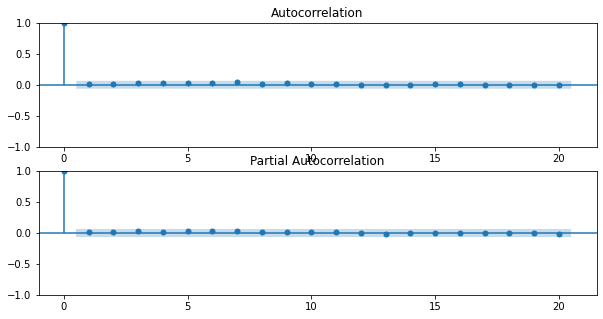

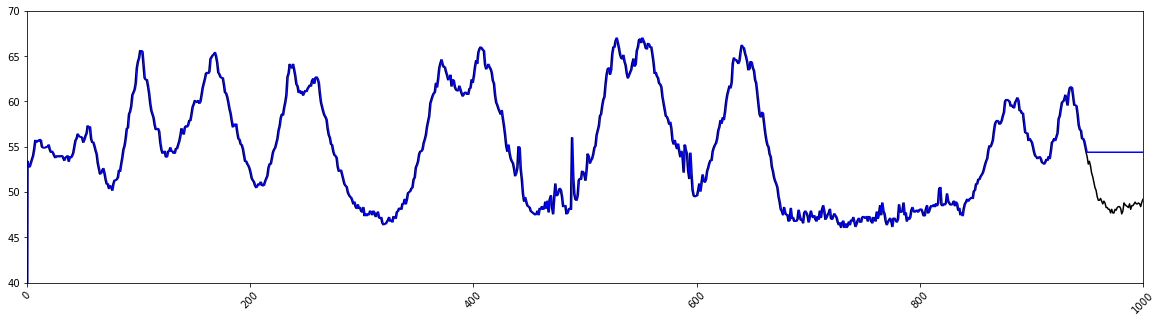

In [8]:
model = sm.tsa.UnobservedComponents(passengers, 'local level')
# model = sm.tsa.UnobservedComponents(passengers, 'local linear trend')
# model = sm.tsa.UnobservedComponents(passengers,'local linear trend',seasonal=12)
# model = sm.tsa.UnobservedComponents(passengers, 'random walk with drift',seasonal=12)
# model = sm.tsa.UnobservedComponents(passengers, 'random walk with drift')
# model = sm.tsa.UnobservedComponents(passengers,'local linear deterministic trend',seasonal=12)
# model = sm.tsa.UnobservedComponents(passengers,'local linear deterministic trend')

kalman = model.fit(method='bfgs')
residkalman= kalman.resid
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residkalman.values.squeeze(), lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residkalman, lags=20, ax=ax2)

pred = kalman.predict(start=start, end=end, typ='levels')
plt.figure(figsize=(20,5))
plt.plot(np.arange(start, end+1), passengers_plot.loc[start:end], 'k')
plt.plot(np.arange(start, end+1), pred, "b")
plt.xticks(rotation=45)
i=0
plt.xlim(start, end)
plt.ylim(40, 70)
# pred = kalman.predict(typ='levels')
# plt.figure(figsize=(20,5))
# plt.plot(passengers[40:],'--')
# plt.plot(pred, "k")
# plt.xticks(rotation=45)

plt.show()